# STAT207 Final Project - Movie Reviews Analysis

Nora and Mathew

## 1. Introduction

**Our motivation**

We are interested in studying this dataset because we both enjoy movies, and find it intriguing to discover what influences their ratings. We also hoped to be able to analyze different directors and writers to see how their scores differ, but were unable to find a useful way to do this within the bounds of this project.

**Other motivations and uses**

The answers to these research questions could also be applied in the film industry. If directors and writers are interested in what will make their film more likely to succeed and receive an overall good rating, they could use these research questions and similar questions to optimize their decision making regarding each of these variables.

**Section 2 main question**

What is the relationship between audienceScore and tomatoMeter, and how does this relationship change with different genres?


**Section 3 main question**

Is there a difference in audience ratings for movies that are rated R compared to movies that are not rated R?

**Section 4 main question**

What is the relationship between the tomato meter score and whether a film is a drama, the audience score, the runtime (minutes), and whether the movie is rated R?

**Section 5 main question**

Is there a linear relationship between the log-odds of a movie being highly rated and its runtimeMinutes, boxOffice, releaseDateTheaters, and releaseDateStreaming? Which explanatory variables should be included in the model to build a parsimonious model?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import numpy as np
from scipy.stats import f
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('rotten_tomatoes_movies.csv')
df = df.dropna()
df.head(10)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
88,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",English,Mira Nair,Sabrina Dhawan,$13.9M,USA Films,"Dolby Stereo, Dolby Digital, Dolby A, Surround..."
146,robin_hood_2018,Robin Hood,40.0,15.0,PG-13,"['Extended Sequences of Violence', 'Action', '...",2018-11-21,2019-02-19,118.0,"Action, Adventure",English,Otto Bathurst,"Ben Chandler,David James Kelly",$30.8M,Lionsgate Films,Dolby Atmos
151,my_giant,My Giant,25.0,21.0,PG,"['Violence', 'Language', 'Brief Crude Humor']",1998-04-10,1998-09-29,103.0,"Comedy, Drama",English,Michael Lehmann,"Billy Crystal,David Seltzer,David Seltzer",$8.0M,Columbia Pictures,"SDDS, Dolby SR, Dolby Digital, Surround, Dolby..."
273,west_side_story_2021,West Side Story,93.0,91.0,PG-13,"['Some Strong Violence', 'Brief Smoking', 'Str...",2021-12-10,2022-03-02,156.0,"Musical, Romance",English,Steven Spielberg,Tony Kushner,$38.5M,20th Century Studios,"Dolby Digital, Dolby Atmos"
308,youth_2015,Youth,69.0,71.0,R,"['Language', 'Graphic Nudity', 'Some Sexuality']",2015-12-04,2016-03-01,118.0,Drama,English,Paolo Sorrentino,Paolo Sorrentino,$2.7M,Fox Searchlight,Dolby Atmos
457,intimate_strangers_2003,Intimate Strangers,69.0,86.0,R,['Sexual Dialogue'],2004-02-06,2004-12-28,103.0,Drama,French (Canada),Patrice Leconte,Jérôme Tonnerre,$2.1M,Paramount Pictures,"Surround, Dolby SRD"
468,jurassic_world_dominion,Jurassic World Dominion,77.0,29.0,PG-13,"['Language', 'Intense Sequences of Action', 'S...",2022-06-10,2022-09-02,147.0,"Action, Adventure, Sci-fi, Mystery & thriller",English,Colin Trevorrow,"Emily Carmichael,Colin Trevorrow",$376.0M,Universal Pictures,"Dolby Digital, Dolby Atmos"
473,hansel_and_gretel_witch_hunters,Hansel & Gretel: Witch Hunters,53.0,16.0,R,"['Fantasy Horror Violence/Gore', 'Brief Sexual...",2013-01-25,2013-06-11,88.0,"Fantasy, Horror, Action, Adventure",English,Tommy Wirkola,Tommy Wirkola,$55.7M,"Paramount Pictures, Metro-Goldwyn-Mayer Distri...","SDDS, Datasat, Dolby Digital"
499,juno,Juno,88.0,94.0,PG-13,"['Mature Thematic Material', 'Language', 'Sexu...",2007-12-25,2008-04-15,96.0,"Comedy, Drama",English,Jason Reitman,Diablo Cody,$143.5M,Fox,"SDDS, Dolby Digital, DTS, Dolby SRD"
659,peaceful_warrior,Peaceful Warrior,76.0,25.0,PG-13,"['Sensuality', 'Accident Scenes', 'Sex Referen...",2006-06-02,2006-12-19,121.0,Drama,English,Victor Salva,Kevin Bernhardt,$1.1M,Lionsgate Films,Dolby Digital


In [4]:
df.shape

(3128, 16)

In [37]:
df.dtypes

id                       object
title                    object
audienceScore           float64
tomatoMeter             float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
writer                   object
boxOffice                object
distributor              object
soundMix                 object
averageScore            float64
not_R                      bool
Rated_R                    bool
drama                      bool
y                         int64
dtype: object

Within this dataset, there are many interesting variables to work with. While we decided on research questions based on the available data (using a data first approach), there were variables that proved more difficult to work with that we did not include in our questions. One example of this is the boxOffice variable. If this variable had been a float64 or int64 type, we would have liked to use it in our analyses. However, the dollar signs and periods made it too difficult to work with these numbers. The same problem was present for the release date in theaters and the release date on streaming platforms.

Additionally, genres were largely mixed and there were not many movies that were listed under only one genre. This made the genre variable more difficult to work with as well.

Despite these limitations, we enjoyed the analyses we were able to perform on the dataset and were able to use creative processes to complete this project. Both members of our team were able to create new variables out of the existing data in order to complete a more well-rounded, useful report.

## 2. Descriptive Analytics

What is the relationship between audienceScore and tomatoMeter, and how does this relationship change with different genres?

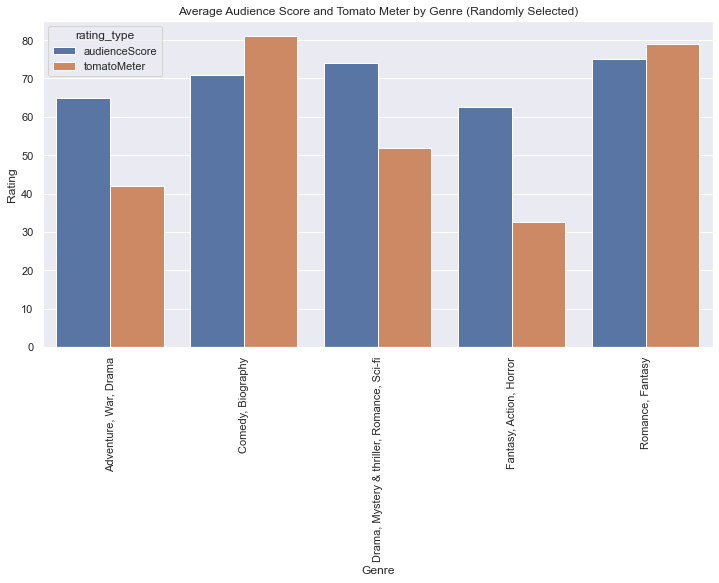

In [6]:
unique_genres = df['genre'].unique()
selected_genres = pd.Series(unique_genres).sample(5, random_state=42).tolist()
filtered_data = df[df['genre'].isin(selected_genres)]
grouped_data = filtered_data.groupby('genre')[['audienceScore', 'tomatoMeter']].mean().reset_index()
melted_data = grouped_data.melt(id_vars='genre', var_name='rating_type', value_name='rating')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='genre', y='rating', hue='rating_type')
plt.title('Average Audience Score and Tomato Meter by Genre (Randomly Selected)')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.show()

For the relationship between Tomato Meter and Audience Score, in the genre "Comedy, Biography" and "Romance, Fantasy", the two score are almost the same. But for the genre "Adventure, War, Drama", "Drama, Mystery & thriller, Romance, Sci-fi" and "Fantasy, Action, Horror", the difference in the Tomato Meter and Audience Score are very abvious. So we can conclude that the relationship between the Tomato Meter and Audience Score will change with different genres.

I want to know that what is each moives' average score between Tomato Meter and Audience Score, and is there a relationship between the average score and the runtimeMinutes. (Add a new column for the average score and draw a scatterplot for average score and runtimeMinutes.) At first glance, I assume that longer runtime will have higher average score.

In [7]:
df['averageScore'] = (df['audienceScore'] + df['tomatoMeter']) / 2

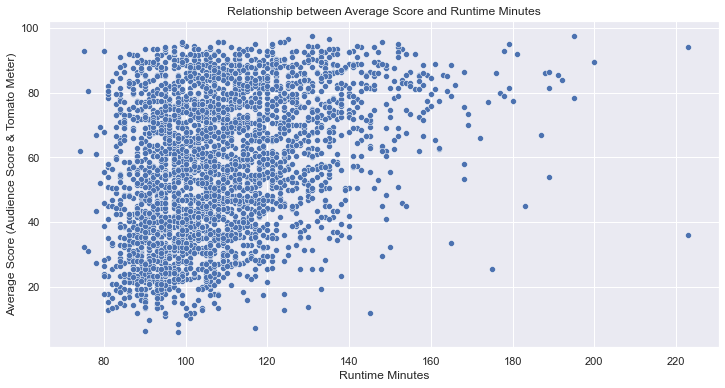

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='runtimeMinutes', y='averageScore')
plt.title('Relationship between Average Score and Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Score (Audience Score & Tomato Meter)')
plt.show()

According to the scatterplot, we could find that there is no relationship between runtime minutes and average score. What's more we can see that most of the movie ended within 120 minutes.

## 3. Inference

**Question of Interest:**

Is the population mean audience score different between movies on Rotten Tomatoes that are rated R and movies that are not rated R?

**Hypothesis test**

mu1 = Mean audience score of films from Rotten Tomatoes that are not rated R

mu2 = Mean audience score of films from Rotten Tomatoes that are rated R

Ho: mu1-mu2 = 0

Ha: mu1-mu2 != 0

alpha = 0.05

First, I will check the conditions for this hypothesis test to be performed.

**Checking Conditions**

1. The sample of films that are Rated R is a random sample

    This condition is met
    
    
2. n(rated R) = 1466 < 10% of all movies on Rotten Tomatoes that are rated R

    We can reasonably assume this condition is met
    
    
3. Sample of films that are not rated r is sampled randomly

    This condition is met
    
    
4. n(not rated r) = 1662 < 10% of all movies on Rotten Tomatoes that are not rated R

    We can reasonably assume this condition is met
    
    
5. 1466 > 30

    This condition is met
    
    
6. 1662 > 30

    This condition is met
    
    
7. We can assume there is no pairwise relationship between the movies in both groups in this sample.

    This condition is met

Next, I will calculate a 95% confidence interval for the difference in the two means. This is to see if the confidence interval contains 0.

In [9]:
df['not_R'] = df['rating'] != 'R'
df['Rated_R'] = df['rating'] == 'R'
print('Not R:', len(df[df['not_R'] == 1]))
print('Rated R:', len(df[df['Rated_R'] == 1]))

Not R: 1662
Rated R: 1466


In [10]:
no_R = df[df.Rated_R == 0]
R = df[df.Rated_R == 1]

In [11]:
critical_value = t.ppf(0.975, df=1466)
point_estimate = R['audienceScore'].mean() - no_R['audienceScore'].mean()
std_R = R['audienceScore'].std()
std_noR = no_R['audienceScore'].std()
ste = np.sqrt((std_R**2)/1466 + (std_noR**2)/1662)

In [12]:
lower = point_estimate - critical_value*ste
upper = point_estimate + critical_value*ste
print('95% Confidence Interval:', lower,upper)

95% Confidence Interval: 0.9223933284153119 3.625249758448929


Next, I will calculate a p-value for this hypothesis test. This is more analysis of whether or not the slope would reasonabl be 0, as suggested in the null hypothesis, or non-zero, as suggested in the alternative hypothesis.

In [13]:
test_stat = (point_estimate-0)/ste
test_stat

3.300427468852911

In [14]:
pval = 2*(1-t.cdf(np.abs(test_stat), df=45))
pval

0.0018945633041054233

Because the p-value is < our significance level of .05 we would reject the null hypothesis and say that there is sufficient evidence that the mean audience score for movies on Rotten Tomatoes that are Rated R is difference from the mean audience score for movies on Rotten Tomatoes that are not rated R. Additionally, 0 does not fall into our 95% confidence interval for the difference of these two population means.

## 4. Linear Regression

What is the relationship between the tomato meter score and whether a film is a drama, the audience score, the runtime (minutes), and whether the movie is rated R?

In [15]:
df['drama'] = df.genre == 'Drama'

In [16]:
df['Rated_R'] = df['rating'] == 'R'

The tomatoMeter variable is the numeric response variable for this model. The four predictor variables I have chosen are whether the film is a drama, the audience score for the film, the film's runtime in minutes and whether the film is rated R.

In [17]:
result = smf.ols('tomatoMeter ~ drama + audienceScore + runtimeMinutes + Rated_R', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tomatoMeter   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     750.4
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:08:07   Log-Likelihood:                -13718.
No. Observations:                3128   AIC:                         2.745e+04
Df Residuals:                    3123   BIC:                         2.748e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -19.2079      2.169     -8.855      0.000     -23.461     -14.955
drama[T.True]      -0.5888      1.103     -0.534      0.593      -2.751       1.573
Rated_R[T.True]     6.2771      0.701      8.952      0.000       4.902       7.652
audienceScore       0.9268      0.019     47.681      0.000       0.889       0.965
runtimeMinutes      0.1087      0.020      5.336      0.000       0.069       0.149
==============================================================================
Omnibus:                       37.298   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.735
Skew:                          -0.256   Prob(JB):                     6.40e-09
Kurtosis:                       2.833   Cond. No.                         795.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Equation**

Yhat = -19.2079 - 0.5888 * drama + .9268 * audienceScore + 0.1087 * runtimeMinutes + 6.2771 * Rated_R

**Next, I will check the conditions for this linear regression model useing a fitted vs residuals plot, a pairplot of the two numeric predictor variables and a histogram of the residuals**

Note: for drama and Rated_R, the values will be 0 if False and 1 if True.

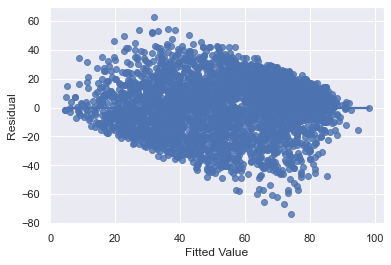

In [18]:
sns.regplot(x=result.fittedvalues, y=result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

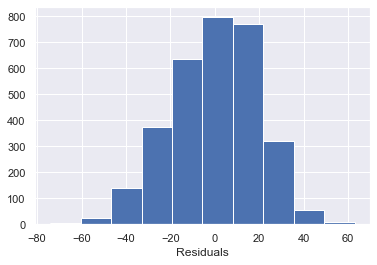

In [38]:
plt.hist(result.resid)
plt.xlabel('Residuals')
plt.show()

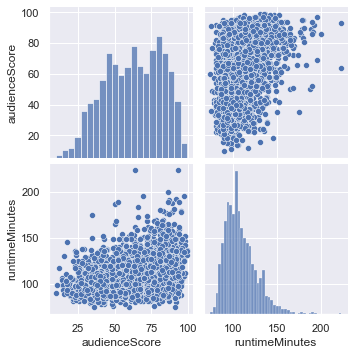

In [39]:
sns.pairplot(df[['audienceScore', 'runtimeMinutes']])
plt.show()

In [40]:
df[['audienceScore', 'runtimeMinutes']].corr()

,audienceScore,runtimeMinutes
audienceScore,1.000000,0.347293
runtimeMinutes,0.347293,1.000000


**Condition 1: Linearity**: Because the distribution of points above and below the line on the fitted versus residuals plot are not evenly distributed above and below the line as we move from left to right, we cannot say that the linearity condition is met.

**Condition 2: Constant Variability of Residuals**: Because the y-axis spread of the points on the fitted versus residuals plot changes as we move from left to right, this condition is not met

**Condition 3: Normality of Residuals**: The histogram of residuals is very close to normal with a center around 0, but it appears to be slightly skewed left. For this reason, this condition is slightly not met.

**Condition 4: Independence of Residuals**: The data is randomly sampled and it is reasonable to assume that the sample size n=3128 < 10% of all movies on Rotten Tomatoes

**Condition 5: No Multicollinearity**: Based on the pairplot and correlation shown above, there is a weak correlation between runtime and audience score (.347), but I would say this is not very significant. This condition is met.

**Checking the strength of the model**

In [22]:
result.rsquared

0.4900843946360738

About 49% of variability in our response variable is explained by this model. This indicates a moderate relationship between the tomato meter score in comparison to the audience score, whether the movie is a drama, whether the movie is rated R, and the movie's runtime.

**Next, I will make a prediction of the tomato meter score if the audience score is 70, the runtime is 100 minutes, the film is not a drama and it is rated R**

In [23]:
result.predict(exog=dict(audienceScore = 70, runtimeMinutes = 100, drama=0, Rated_R = 1))

0    62.808503
dtype: float64

**Finally, I will be checking which slopes we have sufficient evidence to say are nonzero**

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tomatoMeter   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     750.4
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:08:07   Log-Likelihood:                -13718.
No. Observations:                3128   AIC:                         2.745e+04
Df Residuals:                    3123   BIC:                         2.748e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -19.2079      2.169     -8.855      0.000     -23.461     -14.955
drama[T.True]      -0.5888      1.103     -0.534      0.593      -2.751       1.573
Rated_R[T.True]     6.2771      0.701      8.952      0.000       4.902       7.652
audienceScore       0.9268      0.019     47.681      0.000       0.889       0.965
runtimeMinutes      0.1087      0.020      5.336      0.000       0.069       0.149
==============================================================================
Omnibus:                       37.298   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.735
Skew:                          -0.256   Prob(JB):                     6.40e-09
Kurtosis:                       2.833   Cond. No.                         795.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have sufficient evidence to say that runtime, audience score and whether or not the movie is rated R all have non-zero slopes in the population model. This is because the p-value for each of these slopes in the result summary is 0 and 0 is not contained in the 95% confidence intervals for these slopes. This means that we would reject the hypothesis that B = 0 for each of these slopes.

The linear regression model helps to answer the research question "what is the relationship between the tomato meter score and whether a film is a drama, the audience score, the runtime (minutes), and whether the movie is rated R?" very well. The linear regression model, visualisations associated with it (scatterplot of fitted vs residuals, histogram of residuals, pairplot for predictor variables), r^2 value given from the model, and predictive abilities help give a straightforward answer about which variables have a direct effect on tomato meter score.

## 5. Logistic Regression

Is there a linear relationship between the log-odds of a movie being highly rated and its runtimeMinutes, boxOffice, releaseDateTheaters, and releaseDateStreaming? Which explanatory variables should be included in the model to build a parsimonious model?

a) To start with, calculate the average score for each movie and create a binary categorical variable indicating whether a movie is highly rated or not. Assign the highly rated movies the value 1 and not highly rated moives the value 0.

In [25]:
df['averageScore'] = (df['audienceScore'] + df['tomatoMeter']) / 2
threshold = df['averageScore'].quantile(0.75)
df['y'] = 1 * (df['averageScore'] >= threshold)
df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,director,writer,boxOffice,distributor,soundMix,averageScore,not_R,Rated_R,drama,y
88,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,Mira Nair,Sabrina Dhawan,$13.9M,USA Films,"Dolby Stereo, Dolby Digital, Dolby A, Surround...",91.0,False,True,False,1
146,robin_hood_2018,Robin Hood,40.0,15.0,PG-13,"['Extended Sequences of Violence', 'Action', '...",2018-11-21,2019-02-19,118.0,"Action, Adventure",...,Otto Bathurst,"Ben Chandler,David James Kelly",$30.8M,Lionsgate Films,Dolby Atmos,27.5,True,False,False,0
151,my_giant,My Giant,25.0,21.0,PG,"['Violence', 'Language', 'Brief Crude Humor']",1998-04-10,1998-09-29,103.0,"Comedy, Drama",...,Michael Lehmann,"Billy Crystal,David Seltzer,David Seltzer",$8.0M,Columbia Pictures,"SDDS, Dolby SR, Dolby Digital, Surround, Dolby...",23.0,True,False,False,0
273,west_side_story_2021,West Side Story,93.0,91.0,PG-13,"['Some Strong Violence', 'Brief Smoking', 'Str...",2021-12-10,2022-03-02,156.0,"Musical, Romance",...,Steven Spielberg,Tony Kushner,$38.5M,20th Century Studios,"Dolby Digital, Dolby Atmos",92.0,True,False,False,1
308,youth_2015,Youth,69.0,71.0,R,"['Language', 'Graphic Nudity', 'Some Sexuality']",2015-12-04,2016-03-01,118.0,Drama,...,Paolo Sorrentino,Paolo Sorrentino,$2.7M,Fox Searchlight,Dolby Atmos,70.0,False,True,True,0


b) First, fit a linear model predicting whether a moive is highly rated (using your y variable) based on the runtime minutes. Print the resulting coefficients.

In [26]:
X = df[['runtimeMinutes']]
y = df['y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.params)

const            -0.432253
runtimeMinutes    0.006278
dtype: float64


/Users/noraduffy/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


c) Predict the value of y for a moive that has 100 minutes runtime.

Is this predicted value reasonable?

In [27]:
num_characters = 100
predicted_y = model.params['const'] + model.params['runtimeMinutes'] * num_characters
print(predicted_y)

0.19558433331199426


The predicted value of y for a movie with 100 runtime minutes is 0.19558433331199487. This value is between 0 to 1, which is in the range of our binary target variable.

d) Now, we'll consider instead a simple logistic regression model to predict whether a movie is highly rated or not based on the minute of runtime. a) Start by visualizing the relationship between these two variables with an appropriate graph. Make sure to include appropriate plot labels & titles. Add in a logistic regression curve to this visualization.

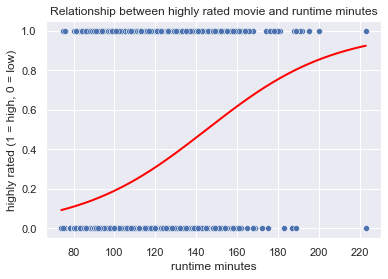

In [28]:
plt.figure()
sns.scatterplot(x='runtimeMinutes', y='y', data=df)
plt.xlabel('runtime minutes')
plt.ylabel('highly rated (1 = high, 0 = low)')
plt.title('Relationship between highly rated movie and runtime minutes')
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(df[['runtimeMinutes']], df['y'])
x_values = np.linspace(df['runtimeMinutes'].min(), df['runtimeMinutes'].max(), 300)
predicted_probabilities = logit_model.predict_proba(x_values.reshape(-1, 1))[:, 1]
sns.lineplot(x=x_values, y=predicted_probabilities, color='red', lw=2)
plt.show()

f) Next, fit the logistic regression model for this relationship. Print the fitted model. Write the fitted regression line.

In [29]:
logit_model = LogisticRegression()
logit_model.fit(df[['runtimeMinutes']], df['y'])
coef = logit_model.coef_[0][0]
intercept = logit_model.intercept_[0]
print(f"Log-odds: log(p / (1 - p)) = {intercept:.4f} + {coef:.4f} * runtimeMinutes")

Log-odds: log(p / (1 - p)) = -4.6551 + 0.0321 * runtimeMinutes


g) Interpret the fitted coefficients. You should give four interpretations:

for the intercept in terms of odds,
for the slope in terms of log odds, and
for the slope in terms of odds.
When runtimeMinutes is equal to 0, the odds of being highly rated are e^(-4.6551) = 0.0096. For every one-minute increase in runtimeMinutes, the log-odds of a movie being highly rated increases by 0.0321. This means that, as the movie runtime increases, the log-odds of being highly rated also increases, indicating a positive relationship between runtimeMinutes and the log-odds of being highly rated. For every one-minute increase in runtimeMinutes, the odds of a movie being highly rated are multiplied by e^(0.0321) = 1.0325. This means that, as the movie runtime increases by one minute, the odds of it being highly rated increase by 3.25%.

h) Using the model, predict the probability, odds, and log odds that a movie will be highly rated with 100 runtime minutes. Be sure to specify which quantity you are predicting & the level you are predicting these values for. Which of these three predicted values should we compare to the predicted value from above? How does it compare?

In [30]:
log_odds_real = -4.6551 + 0.0321 * 100
log_odds_real

-1.4451000000000005

p = 1 / (1 + e^(-(-1.4451))) = 0.19 This means that the model predicts a 19.06% probability of a movie with a 100-minute runtime being highly rated. odds_real = e^(-1.4451) = 0.2355 This means that the odds of a movie with a 100-minute runtime being highly rated are approximately 0.2355 to 1. The log-odds value we calculated earlier is -1.4451. This value represents the natural logarithm of the odds ratio for a movie with a 100-minute runtime being highly rated. A negative log-odds value indicates that the odds of highly rated are less than the odds of not highly rated.

Part 2

a)Next we do the training and test dataset

In [31]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=123)
moviemod = smf.logit('y ~ runtimeMinutes + rating + audienceScore + tomatoMeter', 
                     data=df_train).fit()
moviemod.summary()

         Current function value: 0.000000
         Iterations: 35


/Users/noraduffy/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/noraduffy/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/noraduffy/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:                          Logit   Df Residuals:                     2494
Method:                           MLE   Df Model:                            7
Date:                Mon, 01 May 2023   Pseudo R-squ.:                   1.000
Time:                        20:08:08   Log-Likelihood:            -1.0731e-05
converged:                      False   LL-Null:                       -1414.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4625.2136   9.45e+04     -0.049      0.961    -1.9e+05    1.81e+05
rating[T.PG]       26.8941   7461.859      0.004      0.997   -1.46e+04    1.47e+04
rating[T.PG-13]    27.8576   7455.684      0.004      0.997   -1.46e+04    1.46e+04
rating[T.R]        27.8240   7447.127      0.004      0.997   -1.46e+04    1.46e+04
rating[T.TVPG]   -294.4118   2.56e+05     -0.001      0.999   -5.03e+05    5.02e+05
runtimeMinutes     -0.0138     19.956     -0.001      0.999     -39.127      39.100
audienceScore      30.1550    612.093      0.049      0.961   -1169.526    1229.836
tomatoMeter        30.1616    611.320      0.049      0.961   -1168.004    1228.327
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
b) Write the fitted logistic regression model equation. Make sure to use the correct notation.

logit(P(y=1)) = -4625.2142 + 26.8940 rating_PG + 27.8575 rating_PG-13 + 27.8240 rating_R + (-294.4118) rating_TVPG - 0.0138 runtimeMinutes + 30.1550 audienceScore + 30.1616 * tomatoMeter

In this problem, we will use our model from Question a to create a classifier for our testing data.

c) Use the predictive probability threshold of 
p
0
=
0.6
 and the model from Question a to build a classifier on the testing data. Add the predicted classifications as a column to the testing data, and display this data.

In [32]:
predicted_probabilities = moviemod.predict(df_test[['runtimeMinutes', 'rating', 'audienceScore', 'tomatoMeter']])
threshold = 0.6
predicted_classifications = (predicted_probabilities >= threshold).astype(int)
test_data_with_predictions = df_test.copy()
test_data_with_predictions['predicted_superhost'] = predicted_classifications
print(test_data_with_predictions.head())

                               id                 title  audienceScore  \
68288                       click                 Click           66.0   
38833                       ted_2                 Ted 2           50.0   
109432                      saved                Saved!           78.0   
77465   in_the_mood_for_love_2001  In the Mood for Love           94.0   
92925            dan_in_real_life      Dan in Real Life           69.0   

        tomatoMeter rating                                     ratingContents  \
68288          34.0  PG-13  ['Language', 'Crude and Sex-Related Humor', 'S...   
38833          44.0      R  ['Pervasive Language', 'Crude and Sexual Conte...   
109432         61.0  PG-13  ['Pregnancy', 'Language', 'Sexual Content', 'S...   
77465          91.0     PG            ['Thematic Elements', 'Brief Language']   
92925          65.0  PG-13                                  ['Some Innuendo']   

       releaseDateTheaters releaseDateStreaming  runtimeMinutes  \
6

d) Calculate the entries of a confusion matrix for this classification.


In [33]:
cm = confusion_matrix(df_test['y'], test_data_with_predictions['predicted_superhost'])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[472   0]
 [  0 154]]


e) Calculate the following accuracy measures for this classification of the dataset:

sensitivity rate

specificity rate

false positive rate

In [34]:
sensitivity_rate = 154 / (154 + 0)
print("Sensitivity Rate:", sensitivity_rate)
specificity_rate = 472 / (472 + 0)
print("Specificity Rate:", specificity_rate)
false_positive_rate = 0 / (0 + 472)
print("False Positive Rate:", false_positive_rate)

Sensitivity Rate: 1.0
Specificity Rate: 1.0
False Positive Rate: 0.0


The specificity rate (1) is equal than the sensitivity rate (1). This didn't means that our classifier model was better at correctly classifying hosts that are actually not superhosts compared to hosts that actually are superhosts.

/Users/noraduffy/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/var/folders/hr/wrbktjxj7m53rjrcmcvd8vxr0000gn/T/ipykernel_19569/1992846702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_prob'] = moviemod.predict(df_test)


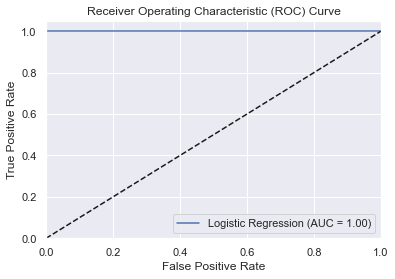

AUC: 1.00


In [35]:
df_test['predicted_prob'] = moviemod.predict(df_test)
fpr, tpr, thresholds = roc_curve(df_test['y'], df_test['predicted_prob'])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(df_test['y'], df_test['predicted_prob']))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
auc = roc_auc_score(df_test['y'], df_test['predicted_prob'])
print("AUC: %0.2f" % auc)

An AUC of 1.00 indicates that classifier has perfect discrimination, it is able to perfectly distinguish between the two classes in target variable. This means that your classifier has 100% sensitivity and specificity, resulting in no false positive or false negative predictions.

Conclusion: I found that I can't fit another logistic regression model to the training data. I tried to find another than those explanatory variables, but it just can't to form a new logistic regression model. Since the AUC for this current model is 1.00, I will perfer in using this model.

## 6. Conclusion

For part 2, what we are trying to find is the relationship between the Score of a movie and its runtime in minutes along with its type. According to what we found, the scores between different types are different, and there is no relation between the score and it’s runtime in minutes. For part 3, we are trying to find whether the population mean audience score is different between movies that are rated R and movies that are not rated R. In the end, we found that the p-value is < our significance level of .05, so we would reject the null hypothesis and say that there is sufficient evidence that the mean audience score for movies on Rotten Tomatoes that are Rated R is different from the mean audience score for movies on Rotten Tomatoes that are not rated R. Additionally, 0 does not fall into our 95% confidence interval for the difference of these two population means, which further shows that there is a difference in the means. For part 4, we are trying to find what the relationship between the tomato meter score and whether a film is a drama, the audience score, the runtime (minutes), and whether the movie is rated R is. In the end, we have sufficient evidence to say that runtime, audience score and whether or not the movie is rated R all have non-zero slopes in the population model. This is because the p-value for each of these slopes in the result summary is 0 (which is less than the significance level of .05), and 0 is not contained in the 95% confidence intervals for these slopes. This means that we would reject the hypothesis that B = 0 for each of these slopes. Lastly, for part 5, we are trying to find if there is a linear relationship between the log-odds of a movie being highly rated and its runtimeMinutes, boxOffice, releaseDateTheaters, and releaseDateStreaming. What we find is p = 1 / (1 + e^(-(-1.4451))) = 0.19 This means that the model predicts a 19.06% probability of a movie with a 100-minute runtime being highly rated. odds_real = e^(-1.4451) = 0.2355 This means that the odds of a movie with a 100-minute runtime being highly rated are approximately 0.2355 to 1. The log-odds value we calculated earlier is -1.4451. This value represents the natural logarithm of the odds ratio for a movie with a 100-minute runtime being highly rated. A negative log-odds value indicates that the odds of highly rated are less than the odds of not highly rated. For the second part of part 5, I found that I can't fit another logistic regression model to the training data. I tried to find another than those explanatory variables, but it just can't to form a new logistic regression model. Since the AUC for this current model is 1.00, I will prefer in using this model.

In the end, we can say that our research questions overall can be solved with this data set, but some are not (the last part of the part 5). If we can have chance do some future work on this dataset we would like to see is there any relationship between the score and the age and the type of movie famous in each age range.